In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [15]:
# run cell for interactive plots
import mpld3
mpld3.enable_notebook()

In [16]:
from limtoc import (load_log, plot_log, display_log_plot, plot_fft,
                    calculate_stiffness, calculate_fit, plot_fit)

running limtoc 626a9c2, k =    3.140


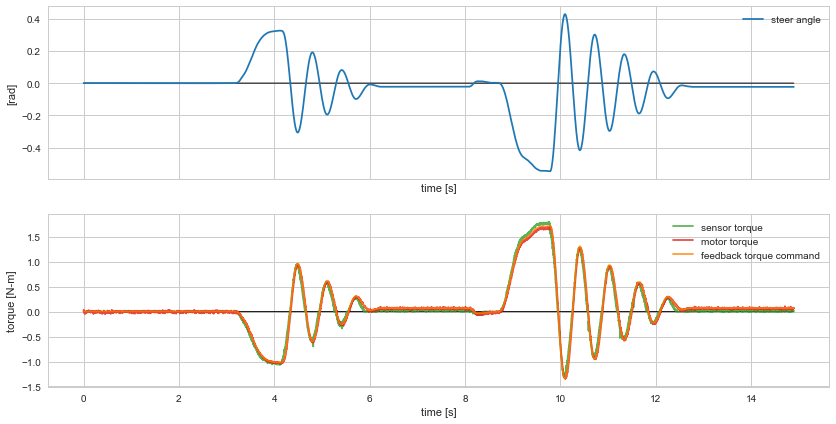

(<matplotlib.figure.Figure at 0x1180ec5f8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1147c5630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d1c16d8>], dtype=object))

In [17]:
data = load_log('torque_oscillation.log.gz')
plot_log(data)

In [30]:
print('x = (a + bt)*exp(c*t)*sin(2*pi*e*t + d)')

# use subset of data when oscillating
d1 = data[4300:6000]
d2 = data[9800:12400]
params = []
for di in [d1, d2]:
    print('data time range [{}:{}]'.format(di.time[0], di.time[-1]))
    fit = calculate_fit(di)
    a, b, c, d, e = fit[1][2]
    
    k_c, k_m = calculate_stiffness(di)
    print('desired stiffness is {} N-m/rad'.format(k_c))
    print('measured stiffness is {} N-m/rad'.format(k_m))
    
    # I = k / (2*pi*f_n)^2
    I = k_m/(2*np.pi*e)**2
    print('')
    print('moment of inertia is {} kg-m^2'.format(I))
    
    print('')
    print('assuming coulomb friction dominates')
    # b = ±2*F_d*2*pi*f_n/(pi*k)
    print('friction torque is {} N-m'.format(np.abs(b * k_m/(4*e))))
    f = {}
    f['inertia'] = I
    f['k'] = k_m
    params.append(f)

x = (a + bt)*exp(c*t)*sin(2*pi*e*t + d)
data time range [4.299983904761905:5.9989839047619045]
desired stiffness is 3.1400629194771628 N-m/rad
measured stiffness is 3.0747205736119034 N-m/rad

moment of inertia is 0.03043904895357336 kg-m^2

assuming coulomb friction dominates
friction torque is 0.08350598823024578 N-m
data time range [9.799983857142857:12.398983857142857]
desired stiffness is 3.140041054924147 N-m/rad
measured stiffness is 3.1182677963264136 N-m/rad

moment of inertia is 0.03055860294178925 kg-m^2

assuming coulomb friction dominates
friction torque is 0.08604230636341675 N-m


In [31]:
params[0]
f = 15
k = (2*np.pi*f)**2 * params[0]['inertia']
print('for f = {}, desired k = ')

{'inertia': 0.030439048953573359, 'k': 3.0747205736119034}